# 줄리아를 생각하다(Think julia)

## Chapter 19. 알아두면 좋은 것들: 구문 규칙

* 도우미 구문 규칙

* Base 패키지에서 바로 이용 가능한 함수, 자료형, 매크로

* 표준 라이브러리에 있는 함수, 자료형, 매크로

### 19.1 명명된 튜플

* **명명된 튜플(named tuple)** 튜플 원소에 이름을 붙인 튜플

In [1]:
x = (a = 1, b = 1 + 1)

(a = 1, b = 2)

In [3]:
# 명명된 튜플에서는 원소를 도트 구문 규칙을 이용해 이름으로 접근할 수 있음

println(x.a, "\n", x.b)

1
2


### 19.2 함수

* 간단한 함수

In [4]:
f(x , y) = x + y

f (generic function with 1 method)

* **익명 함수** (anonymous function)

    * 함수를 정의할 때, 이름을 붙이지 않고 정의 할 수 있음

    * 익명 함수는 보통 다른 함수의 인수로 사용될 때가 많음

In [5]:
x -> x^2 + 2x - 1

#1 (generic function with 1 method)

In [6]:
function (x)
    x^2 + 2x - 1
end

#3 (generic function with 1 method)

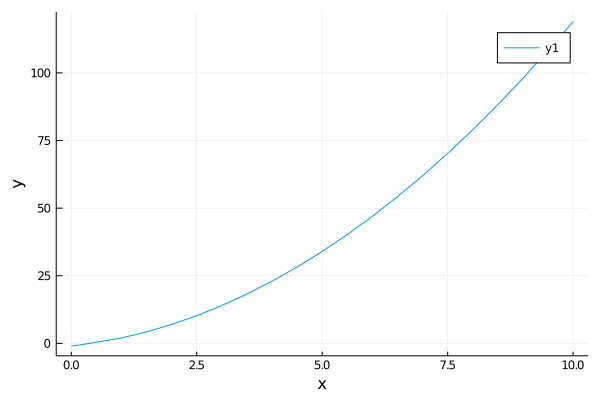

In [8]:
using Plots

plot(x -> x^2 + 2x - 1, 0, 10, xlabel = "x", ylabel = "y")

* **키워드 인수**

    - 함수의 인수도 이름을 붙일 수 있음
    
    - 함수 시그니처에서 **키워드 인수** (keyword argument)는 세미콜론 ```;``` 뒤에 나옴
    
    - 호출할 때는 세미콜론 대신 쉼표로 구분

In [45]:
function myplot(x, y ; style = "solid", width = 5, color = "black")
    plot(x, y, linestyle = Meta.parse(style), lw = width, linecolor = color)
end

myplot (generic function with 1 method)

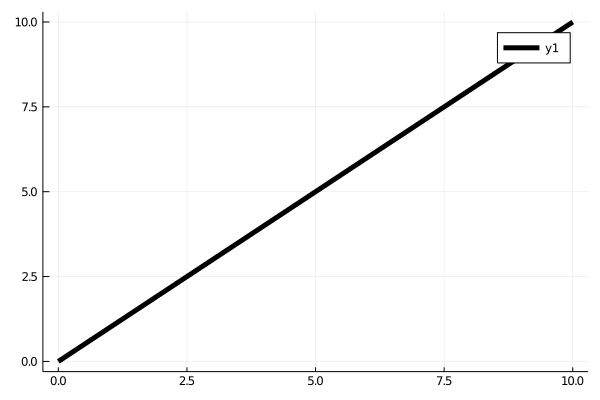

In [50]:
myplot(0:10, 0:10)

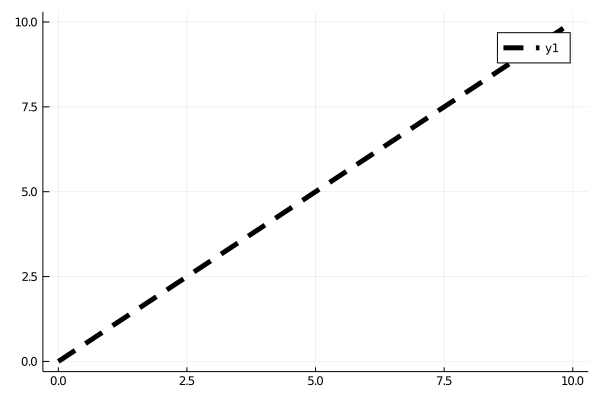

In [51]:
myplot(0:10, 0:10, style = "dash")

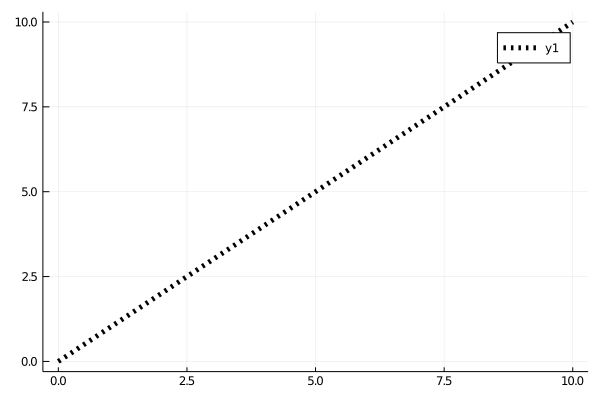

In [48]:
myplot(0:10, 0:10, style = "dot")

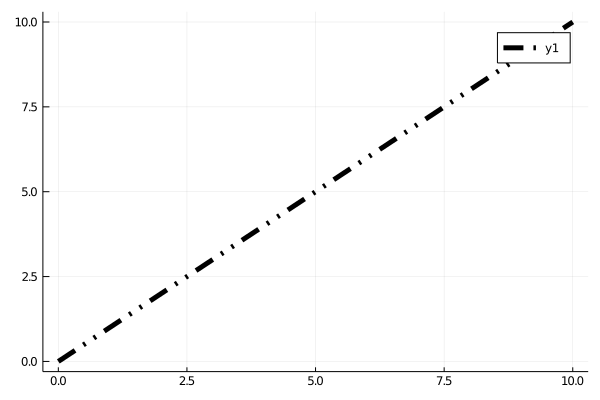

In [49]:
myplot(0:10, 0:10, style = "dashdotdot")

* **클로저** (closure)

    * 함수가 선언될 때, 함수 범위 바깥에서 정의된 변수 값을 잡아두도록 허용하는 기법

In [52]:
foo(x) = () -> x

foo (generic function with 1 method)

In [53]:
bar = foo(1)

#20 (generic function with 1 method)

In [54]:
bar()

1

* 함수 foo는 foo의 인수인 x에 접근하는 익명 함수를 반환함

* bar는 익명 함수를 가리키므로 bar를 호출하면 foo의 인수 값을 반환함

### 19.3 블록

* **블록(block)** 은 여러 개의 문장을 묶는 것

    * 예약어 begin으로 시작해서 end로 끝남
```
```
* @svg 는 여러 개의 문장을 묶는 매크로 명령어로 Luxor 패키지 내에서 정의됨

    - ```@svg```  drawing-instructions [width] [height] [filename]
    
    - 하나의 인수를 받아서 블록 내에서 실행

In [56]:
using Luxor

In [58]:
# 물론 ThinkJulia.jl 패키지가 모두 설치된 것이 아니므로 에러가 발생함

@svg begin
    forward( 🐢, 100)
    turn( 🐢, -90)
    forward( 🐢, 100)
end

LoadError: UndefVarError: forward not defined

* **let블록**

    - 새로운 변수 참조 영역을 생성함
    
    - 첫 번째 ```@show``` 매크로는 let 블록 내에서만 유효한 지역 변수 x, 전역 변수 y, 정의되지 않은 지역 변수 y를 출력

    - 첫 번째 ```@show``` 매크로는 전역변수 x, y, z만 출력

In [59]:
x, y, z = -1, -1, -1;

In [60]:
let x = 1, z
    @show x y z;
end

x = 1
y = -1


LoadError: UndefVarError: z not defined

In [62]:
@show x y z;

x = -1
y = -1
z = -1


* **do블록**

    * do 블록을 사용하면 open 함수에서 생성된 IOStream(<file ./output.txt>)을 자동으로 종료 처리 함

In [63]:
data = "This here's the wattle, \n the emblem of our land.\n"

"This here's the wattle, \n the emblem of our land.\n"

In [66]:
# do블록 예제

open("output.txt", "w") do fout
    write(fout, data)
end

50

In [68]:
# do블록과 기능적으로 동등한 코드 예시
f2 = fout -> begin
    write(fout, data)
end

open(f2, "output.data", "w")

50

_A do block can “capture” variables from its enclosing scope. For example, the variable data in the above example of open ... do is captured from the outer scope._

do 블록은 바깥 범위에 있는 변수 값을 잡아둘 수 있음(변수 data는 do 블록 바깥에서 정의된 것인데도 그 값이 do 블록 안에 잡혀 있게 됨)

### 19.4 흐름 제어

* **삼항 연산자** 와 **단락 평가** 를 활용하면 같은 코드를 더 간결하게 표현할 수 있음

* 프로그램의 흐름을 직접적으로 수정할 수 있는 고급 제어 구조 **태스크(task)** 활용 가능

* **삼항 연산자** (tenary operator) ```condition ? true : false ```

    - if-elseif 구문 대체 가능
    
    - 조건문 실행 결과가 단일한 표현식일 때 특히 유용
    
    - _(조건식)_ ? _(참일 경우 실행문)_ : _(거짓일 경우 실행문)_ 의 구조를 가짐

In [70]:
a = 150

a % 2 == 0 ? println("even") : println("odd")

even


* **단락 평가**

    * 연산자 ```&&``` 와 ```||```는 **단락 평가(short-circuit evaluation)** 을 수행함 
```
```
    * 최종값을 결정하기 위해 꼭 필요할때만 두 번째 피연산자를 평가함

In [72]:
# 재귀적으로 팩토리얼을 구하는 코드에 단락 평가 작성 예시

function fact(n::Integer)
    
    n >= 0 || error("n must be non-negative")
    n == 0 && return 1
    n * fact(n-1)
end

fact (generic function with 1 method)

* **작업(coroutine || task)**

    * **작업** 함수를 반환하지 않으면서도 협조해서 실행 흐름을 주고 받을 수 있게 해주는 제어 구조


* **예시)** 태스크를 사용한 피보나치 수열 계산 코드

In [74]:
# 작업(태스크)를 사용한 피보나치 수열 계산 코드

function fib(c::Channel)
    a = 0 
    b = 1
    put!(c, a)
    while true
        put!(c, b)
        (a, b) = (b, a + b)
    end
end

fib (generic function with 1 method)

In [75]:
fib_gen = Channel(fib);

In [76]:
take!(fib_gen)

0

In [77]:
take!(fib_gen)

1

In [78]:
take!(fib_gen)

1

In [79]:
take!(fib_gen)

2

In [80]:
take!(fib_gen)

3

In [81]:
take!(fib_gen)

5

In [82]:
take!(fib_gen)

8

In [83]:
take!(fib_gen)

13

In [84]:
take!(fib_gen)

21

* put! 함수는 값을 Channel 객체에 저장하고 take! 함수는 저장된 값을 읽음

* Channel의 생성자는 작업을 하나 만듦. 함수 fib는 put!이 호출될 때마다 실행을 중단하고 take!가 불리면 실행을 재개함

* Channel 객체는 반복자로도 사용할 수 있음(실제로 성능상의 이유로, 재개/중단이 반복될 때 여러 개의 값이 Channel 객체에 버퍼링됨)

In [85]:
for val in Channel(fib)
    print(val, " ")
    val > 20 && break
end

0 1 1 2 3 5 8 13 21 

### 19.5 자료형

줄리아는 개발자가 좀 더 유연하게 활용할 수 있는 몇 가지 확장형 자료형을 제공함(원시 자료형, 매개변수 자료형, 공용체)

* **원시 자료형** (primitive type)

    * 자료가 단순 비트로 구성되어 있는 구체 자료형(_A concrete type consisting of plain old bits is called a primitive type._)

    * 다른 개발 언어와 다르게 줄리아에서는 직접 원시 자료형을 선언할 수 있음

    * 표준 원시 자료형도 아래와 같은 식을 정리되어 있음
    
```julia
primitive type Float64 <: AbstractFloat 64 end
primitive type Bool <: Integer8 end
primitive type Char <: AbstractChar 32 end
primitive type Int64 <: Signed 64 end
```

In [89]:
# 원시자료형 Byte 생성 예시

primitive type Byte 8 end
Byte(val::UInt8) = reinterpret(Byte, val) # 8비트 정수(UInt8)를 저장하기 위해 사용됨

Byte

In [90]:
b = Byte(0x01)

Byte(0x01)

* **매개변수 자료형** (parametric type)

    * _Julia’s type system is parametric, meaning that types can have parameters_

    * 자료형 자체가 매개변수를 가질 수 있다는 것을 의미
    
    * 자료형 매개변수(type parameter)는 자료형의 다음에 나오며, 중괄호(curly braces)로 감쌈
    
        * _Type parameters are introduced after the name of the type, surrounded by curly braces:_


* **(예시) 매개변수 자료형**(parametric type) 정의 예시

In [91]:
struct Point{T <: Real}
    x::T
    y::T
end

In [92]:
Point(0.0, 0.0)

Point{Float64}(0.0, 0.0)

* 매개변수 자료형 Point{T<:Real}를 정의하고 있음

    * 이 자료형은 자료형이 T인 두 개의 좌표를 가지고 있음
    
    * 여기서 T는 Real의 어떤 하위 자료형이든 가질 수 있음


* 복합 자료형은 물론 추상 자료형과 원시 자료형도 자료형 매개변수를 가질 수 있음

* 성능상의 이유로 구조체의 필드는 무조건 구체 자료형(concrete type)이 좋음

**(Tip)** _Having concrete types for struct fields is absolutely recommended for performance reasons, so this is a good way to make Point both fast and flexible._

* **공용체** (type union)

    * 인수로 넘겨진 자료형 중 하나로 동작할 수 있는 추상 매개변수 자료형
    
    *_A type union is an abstract parametric type that can act as any of its argument types:_

In [96]:
IntOrString = Union{Int64, String}

Union{Int64, String}

In [97]:
150::IntOrString

150

In [98]:
"Julia"::IntOrString

"Julia"

_A type union is in most computer language an internal construct for reasoning about types. Julia however exposes this feature to its users because efficient code can be generated when the type union has a small number of types. This feature gives the Julia programmer a tremendous flexibility for controlling dispatch._

대부분의 개발 언어에서 공용체는 자료형 처리를 위해 사용하는 내부 구조

줄리아는 이 기능을 사용자 활용할 수 있도록 개방 -> 작은 개수의 자료형을 갖고 있는 공용체를 이용하면 효율적인 코드 작성 가능

줄리아 개발자에게 디스패치를 제어할 수 있는 어마어마한 유연성을 제공함

### 19.6 메서드

**매개변수 메서드** (parametric method)

_Method definitions can also have type parameters qualifying their signature_

메서드 정의 또한 자료형 매개변수를 가질 수 있으며 시그니처를 명확히 하는 용도로 사용함

In [99]:
isintpoint(p::Point{T}) where {T} = (T === Int64)

isintpoint (generic function with 1 method)

In [103]:
p = Point(1, 2)

Point{Int64}(1, 2)

In [104]:
isintpoint(p)

true

**함수형 객체** Function-like Objects

_Any arbitrary Julia object can be made “callable”. Such “callable” objects are sometimes called functors._

임의의 객체는 호출 가능토록 만들어짐

호출 가능한 객체를 종종 함자(functors)라고 부름

In [105]:
struct Polynomial{R}
    coeff::Vector{R}
end

function  (p::Polynomial)(x)
    val= p.coeff[end]
    for coeff in p.coeff[end-1:-1:1]
        val = val * x + coeff
    end
    val
end

In [106]:
p = Polynomial([1, 10, 100])

Polynomial{Int64}([1, 10, 100])

In [107]:
p(3)

931

### 19.7 생성자 (Constructors)

_Parametric types can be explicitly or implicitly constructed:_

매개변수 자료형이 만들어지는 것은 명시적일 수도 있고 암시적일 수도 있음

In [112]:
Point(1,2) # implicit T

Point{Int64}(1, 2)

In [113]:
Point{Int64}(1, 2) # explicit T

Point{Int64}(1, 2)

In [114]:
Point(1, 2.5) # 암시적으로 T가 추론됨

LoadError: MethodError: no method matching Point(::Int64, ::Float64)
[0mClosest candidates are:
[0m  Point(::T, [91m::T[39m) where T<:Real at In[91]:2

* 각 자료형 T에 대해서 기본적인 내부 생성자와 외부 생성자를 다음과 같이 작성

In [118]:
struct Point2{T <: Real}
    x::T
    y::T
    Point2{T}(x, y) where {T <: Real} = new(x, y)
end

In [119]:
Point2(x::T, y::T) where {T<:Real} = Point{T}(x, y);

In [120]:
Point2(1.0, 2.0)

Point{Float64}(1.0, 2.0)

In [121]:
Point2(1, 2)

Point{Int64}(1, 2)

In [122]:
Point2(1, 2.0)

LoadError: MethodError: no method matching Point2(::Int64, ::Float64)
[0mClosest candidates are:
[0m  Point2(::T, [91m::T[39m) where T<:Real at In[119]:1

* 이때 x와 y는 동일한 자료형이어야 함

* 만일 x, y의 자료형이 서로 다른 경우에도 대응하려면, 다음처럼 외부 생성자를 추가 가능

```julia

Point2(x::Real, y::Real) = Point2(promote(x, y)...);

```

### 19.8 변환과 승격

**변환** (conversion) 

* 다른 자료형으로 변환하는 것

* ```convert``` 함수 사용

In [123]:
x = 12
typeof(x)

Int64

In [124]:
convert(UInt8, x)

0x0c

In [125]:
typeof(ans)

UInt8

* ```ans``` 는 마지막 계산된 값을 참조하는 변수임

    - ```ans``` : _A variable referring to the last computed value, automatically set at the interactive prompt._

**승격** (promotion)

* 여러 자료형이 섞인 값들을 단일한 공통의 자료형으로 변환하는 것

* ```promote``` 함수에 메서드를 직접 정의할 수는 없지만, 보조 함수인 ```promote_rule```을 통해 승격 규칙을 정할 수 있음

```julia
promote_rule(::Type{Float64}, ::Type{Int32}) = Float64
```

In [126]:
promote(1, 2.5, 3)

(1.0, 2.5, 3.0)

### 19.9 메타 프로그래밍

- 줄리아 코드는 언어 자체의 자료구조로 표현될 수 있음
    * _Julia code can be represented as a data structure of the language itself. This allows a program to transform and generate its own code._

* **표현식** (Expressions)

    * _Every Julia program starts as a string:_
    
    * _The next step is to parse each string into an object called an expression, represented by the Julia type Expr:_


* 줄리아(대부분의 프로그래밍에서)는 문자열을 작성하고 이를 파싱하여 **표현식(expression)** 이라 불리는 **객체(Expr 자료형)** 로 변환됨

In [127]:
prog = "1 + 2"

"1 + 2"

In [128]:
ex = Meta.parse(prog)

:(1 + 2)

In [129]:
typeof(ex)

Expr

* dump 함수는 주석과 함께 표현식 객체를 표시하는 함수(Expr 객체에 대한 이해를 위해 사용)

* 괄호 앞에 ```:``` 을 붙여서 표현식을 만들 수도 있음

* quote 블록을 이용하여 작성 가능

In [130]:
dump(ex)

Expr
  head: Symbol call
  args: Array{Any}((3,))
    1: Symbol +
    2: Int64 1
    3: Int64 2


In [134]:
println(:(1+2))

typeof(:(1+2))

1 + 2


Expr

In [133]:
ex2 = quote
    1 + 2
    end;

In [136]:
typeof(ex2)

Expr

* **평가(eval)**

    * Julia can evaluate an expression object using eval:

    * eval 함수를 이용해 만들어진 표현식 객체를 평가할 수 있음

In [137]:
eval(ex)

3

In [138]:
eval(ex2)

3

모든 모듈은 모듈 범위 내의 표현식을 평가하기 위해 각자의 **eval** 함수를 가지고 있음

_역자주) 하지만 eval 함수를 매우 자주 호출하고 있다면, 먼가 잘못된 것이므로 eval을 evil(악)로 생각할 것_

* **매크로**

    * Macros can include generated code in a program. 
    
    * A macro maps a tuple of Expr objects directly to a compiled expression


* 매크로를 사용하면 프로그램 안에 생성된 코드를 포함시킬 수 있음

* 매크로는 Expr 객체의 튜플을 컴파일된 표현식으로 바로 대응시킴


In [145]:
macro containervariable(container, element)
    return esc(:($(Symbol(container,element)) = $container[$element]))
end

@containervariable (macro with 1 method)

In [148]:
letters = ["a", "b", "c"]

@containervariable letters 1

"a"

In [150]:
@macroexpand @containervariable letters 1

:(letters1 = letters[1])

* @macroexpand를 사용하면 평가 직전의 표현식에 반환됨

* (장점) Why macros?

    * Macros generate and include fragments of customized code during parse time, thus before the full program is run. (프로그램 구동 전에 매크로 코드 변환이 먼저 일어남 -> 빠른 속도, 효율 증대)

* **생성된 함수(Generated Functions)** 

    * 매크로 ```@generated```를 이용, 메서드가 인수의 특정 자료형에 대응하는 코드를 넣을 수 있도록 함
    
    * 본문에서 반환하는 값은 매크로처럼 :이 붙은 괄호로 감싼 표현식(quote 블록)
    
    * 호출하는 쪽 입장에서는 **생성된 함수** generated function도 보통 함수처럼 동작함

In [163]:
@generated function square(x)
    # println(x)
    :(x * x) # 본문에서 반환하는 값은 quote 블록임
end

square (generic function with 1 method)

In [164]:
x = square(2); 

In [165]:
x

4

In [166]:
y = square("spam");

In [167]:
y

"spamspam"

### 19.10 빠진 값(missing value)

* NaN와 별개로 결측치 처리를 위해서 ```missing```의 자료형을 구현함

* ```missing``` 값이 들어 있는 배열은 자료형이 Union{Missing, T} 형태로 공용체(Union) 형태가 됨 

* 연산 함수에 ```missing```을 포함한 배열을 넣으면 ```missing```을 반환 -> ```skipmissing``` 함수 이용

In [168]:
a = [1, missing]

2-element Vector{Union{Missing, Int64}}:
 1
  missing

In [169]:
sum(a)

missing

In [170]:
sum(skipmissing(a))

1

In [172]:
NaN

NaN

### 19.11 C 포트란 코드 호출

* 매우 많은 코드가 C나 포트란으로 작성되어 있음

* 줄리아는 ccall 구문으로 기존의 C나 포트란 작성 라이브러리를 직접 호출할 수 있음

* GDBM 패키지의 소스코드 중 low_level.jl 파일을 살펴보면 ccall을 이용해 c로 작성된 libgdbm 패키지를 호출하는 함수를 확인할 수 있다. 

```julia
using Compat

function gdbm_open(name::String, flag::String="r")
  handle = ccall((:gdbm_open, libgdbm), Ptr{Cvoid}, (Cstring, Int32, Int32, Int32, Ptr{Cvoid}), name, 0, OPENFLAGS[flag], 420, C_NULL)
  handle == C_NULL && error("File could not be opened!")
  handle
end

function gdbm_close(handle::Ptr{Cvoid})
  ccall((:gdbm_close, libgdbm), Cvoid, (Ptr{Cvoid},), handle)
end

function gdbm_store(handle::Ptr{Cvoid}, key::Datum, value::Datum, flag::String="r")
  ret = ccall((:gdbm_store, libgdbm), Int32, (Ptr{Cvoid}, Datum, Datum, Int32), handle, key, value, STOREFLAGS[flag])
  ret == -1 && error("Database is not writable or key/value is not a valid string.")
  ret == 1 && error("Key is already in database.")
  nothing
end

function gdbm_fetch(handle::Ptr{Cvoid}, key::Datum)
  datum = ccall((:gdbm_fetch, libgdbm), Datum, (Ptr{Cvoid}, Datum), handle, key)
  datum.dptr == C_NULL && throw(KeyError(key))
  datum
end

function gdbm_exists(handle::Ptr{Cvoid}, key::Datum)
  ret = ccall((:gdbm_exists, libgdbm), Int32, (Ptr{Cvoid}, Datum), handle, key)
  ret == 0 && return false
  true
end

function gdbm_count(handle::Ptr{Cvoid})
  count = Ref(UInt(0))
  ret = ccall((:gdbm_count, libgdbm), Int32, (Ptr{Cvoid}, Ref{UInt}), handle, count)
  ret == -1 && error("Error reading database.")
  Int(count[])
end

function gdbm_delete(handle::Ptr{Cvoid}, key::Datum)
  ret = ccall((:gdbm_delete, libgdbm), Int32, (Ptr{Cvoid}, Datum), handle, key)
  ret ≠ 0 && error("Database is not writable or key not found.")
  nothing
end

function gdbm_firstkey(handle::Ptr{Cvoid})
  ccall((:gdbm_firstkey, libgdbm), Datum, (Ptr{Cvoid}, ), handle)
end

function gdbm_nextkey(handle::Ptr{Cvoid}, prev::Datum)
  ccall((:gdbm_nextkey, libgdbm), Datum, (Ptr{Cvoid}, Datum), handle, prev)
end

```

### 19.12 용어집 

* **명명된 튜플** (named tuple)

    - 이름 있는 원소를 가지고 있는 튜플


* **익명함수** (anonymous function)

    - 이름이 부여되지 않고 정의된 함수


* **키워드 인수** (keyword argument)

    - 위치가 아니라 이름으로 구분되는 인수


* **클로저** (closure)

    - 정의되는 범위에 있는 변수 값을 잡아두는 변수


* **블록** (block)

    - 여러 개의 문장을 묶는 방법


* **let 블록** (let block)

    - 새로운 변수 참조 영역이 되는 블록


* **do 블록** (do block)

    - 일반적인 코드 블록처럼 보이지만, 익명 함수를 정의해서 다른 함수의 인수로 넣는 구문 규칙


* **삼항 연산자** (ternary operator)

    - 세 개의 피연산자를 받아 첫 번째 피연산자를 평가한 값이 참이면 두 번째 피연산자를 실행하고, 거짓이면 세 번째 피연산자를 실행하는 흐름 제어 연산자


* **단락 평가** (short-circuit evaluation)

    - 논리 연산자의 평가 방법으로 첫 번째 피연산자의 값으로 결과를 도출할 수 없을 경우에만 두 번째 피연산자를 평가하는 것


* **작업 task** (코루틴 coroutine)

    - 연산 과정을 유연하게 멈췄다가 재개할 수 있도록 하는 흐름 제어 기능


* **원시 자료형** (primitive type)

    - 자료가 단순하게 비트로 되어 있는 구체 자료형


* **매개변수 자료형** (parametric type)

    - 매개변수가 있는 자료형


* **공용체** (type union)

    - 자료형 매개변수에 나열된 자료형들 중 하나로 동작할 수 있는 자료형. 나열된 자료형으로 만든 모든 인스턴스는 이 공용체의 인스턴스이기도 함


* **함자** (functor)

    - 결합된 메서드가 있는 객체. 그러므로 함수처럼 호출 가능함


* **변환** (conversion)

    - 어떤 값의 자료형을 다른 자료형으로 바꾸는 것


* **승격** (promotion)

    - 여러 자료형이 섞여 있는 값들을 하나의 공통 자료형으로 바꾸는 것


* **표현식** (expression)

    - 언어 구조를 담는 줄리아 자료형


* **매크로** (macro)

    - 프로그램 안에 코드를 생성시켜 포함하는 방법


* **생성된 함수** (generated function)

    - 인수의 자료형에 따른 전용 코드를 생성할 수 있는 함수


* **빠진 값** (missig value)

    - 자료 위치에 값이 없음을 표현하는 인스턴스